In [ ]:
! nvidia-smi

Thu Jan  2 09:07:47 2025       
+---------------------------------------------------------------------------------------+
| NVIDIA-SMI 535.104.05             Driver Version: 535.104.05   CUDA Version: 12.2     |
|-----------------------------------------+----------------------+----------------------+
| GPU  Name                 Persistence-M | Bus-Id        Disp.A | Volatile Uncorr. ECC |
| Fan  Temp   Perf          Pwr:Usage/Cap |         Memory-Usage | GPU-Util  Compute M. |
|                                         |                      |               MIG M. |
|=========================================+======================+======================|
|   0  Tesla T4                       Off | 00000000:00:04.0 Off |                    0 |
| N/A   37C    P8              11W /  70W |      0MiB / 15360MiB |      0%      Default |
|                                         |                      |                  N/A |
+-----------------------------------------+----------------------+--

In [ ]:
import os
HOME = os.getcwd()
print(HOME)

/content


In [ ]:
!pip install ultralytics

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 904.4/904.4 kB 50.2 MB/s eta 0:00:00


In [ ]:
import ultralytics
ultralytics.checks()

Ultralytics 8.3.56 🚀 Python-3.10.12 torch-2.5.1+cu121 CUDA:0 (Tesla T4, 15102MiB)
Setup complete ✅ (2 CPUs, 12.7 GB RAM, 32.7/112.6 GB disk)


In [ ]:
from ultralytics import YOLO
from IPython.display import display, Image

In [ ]:
# %cd {HOME}
# !yolo task=detect mode=predict model=yolov8n.pt conf=0.25 source='https://media.roboflow.com/notebooks/examples/dog.jpeg'

In [ ]:
# %cd {HOME}
# !yolo task=detect mode=predict model=yolov8n.pt conf=0.25 source='/dog-park-petting-dog.jpg'

In [ ]:
# %cd {HOME}
# Image(filename='/content/runs/detect/predict2/dog-park-petting-dog.jpg', height=600)

In [ ]:
!pip install roboflow

from roboflow import Roboflow
rf = Roboflow(api_key="use your api key")
project = rf.workspace("demo-vrfsd").project("test_project-3cocv-naktk")
version = project.version(1)
dataset = version.download("yolov8")


   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 81.5/81.5 kB 4.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 66.8/66.8 kB 5.7 MB/s eta 0:00:00
  Attempting uninstall: idna
    Found existing installation: idna 3.10
    Uninstalling idna-3.10:
      Successfully uninstalled idna-3.10
loading Roboflow workspace...
loading Roboflow project...



Extracting Dataset Version Zip to test_project-1 in yolov8:: 100%|██████████| 22230/22230 [00:06<00:00, 3231.75it/s]


In [ ]:
dataset = version.download("yolov8")

In [ ]:
%cd {HOME}

# Start training from a pretrained *.pt model using GPUs 0 and 1
!yolo detect train data=/content/test_project-1/data.yaml model=yolov8s.pt epochs=15 imgsz=640 device=0 save=True

/content
Ultralytics 8.3.56 🚀 Python-3.10.12 torch-2.5.1+cu121 CUDA:0 (Tesla T4, 15102MiB)
engine/trainer: task=detect, mode=train, model=yolov8s.pt, data=/content/test_project-1/data.yaml, epochs=15, time=None, patience=100, batch=16, imgsz=640, save=True, save_period=-1, cache=False, device=0, workers=8, project=None, name=train2, exist_ok=False, pretrained=True, optimizer=auto, verbose=True, seed=0, deterministic=True, single_cls=False, rect=False, cos_lr=False, close_mosaic=10, resume=False, amp=True, fraction=1.0, profile=False, freeze=None, multi_scale=False, overlap_mask=True, mask_ratio=4, dropout=0.0, val=True, split=val, save_json=False, save_hybrid=False, conf=None, iou=0.7, max_det=300, half=False, dnn=False, plots=True, source=None, vid_stride=1, stream_buffer=False, visualize=False, augment=False, agnostic_nms=False, classes=None, retina_masks=False, embed=None, show=False, save_frames=False, save_txt=False, save_conf=False, save_crop=False, show_labels=True, show_conf=Tr

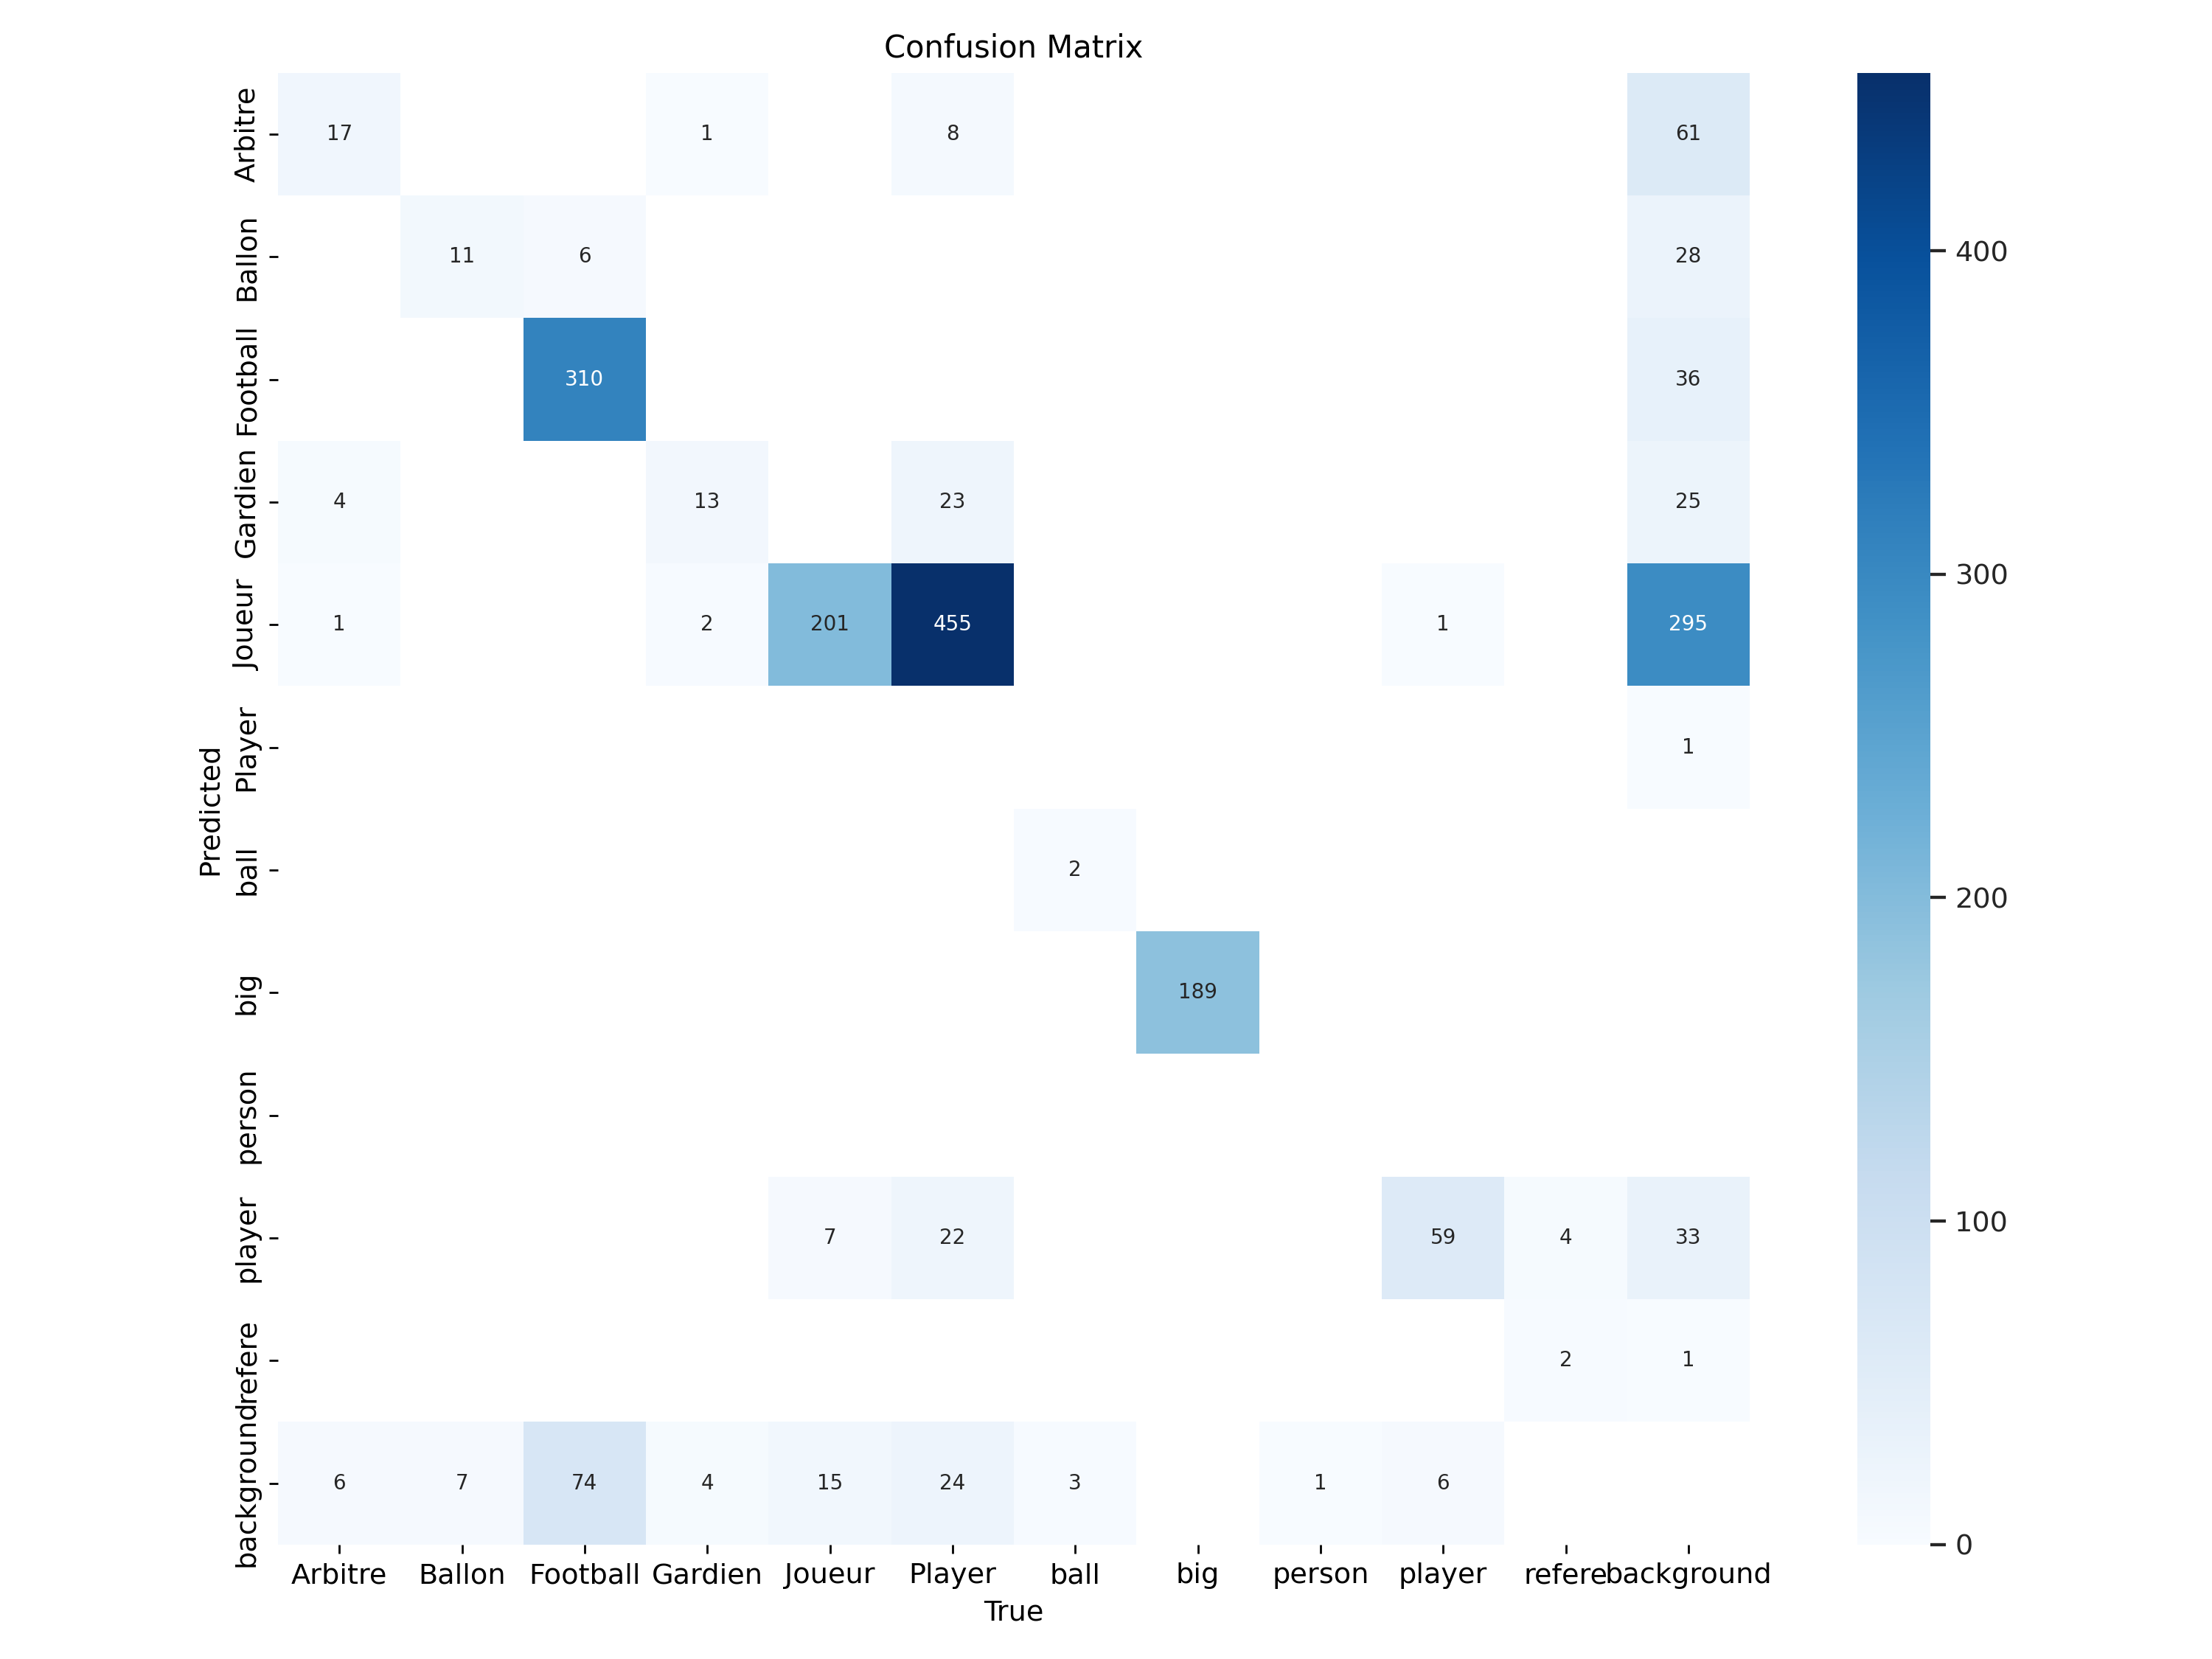

In [ ]:
Image(filename='/content/runs/detect/train2/confusion_matrix.png', height=600)

In [ ]:
!yolo detect val model=/content/runs/detect/train2/weights/best.pt data=/content/test_project-1/data.yaml

Ultralytics 8.3.56 🚀 Python-3.10.12 torch-2.5.1+cu121 CUDA:0 (Tesla T4, 15102MiB)
Model summary (fused): 168 layers, 11,129,841 parameters, 0 gradients, 28.5 GFLOPs
val: Scanning /content/test_project-1/valid/labels.cache... 602 images, 0 backgrounds, 0 corrupt: 100% 602/602 [00:00<?, ?it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100% 38/38 [00:10<00:00,  3.57it/s]
                   all        602       1478      0.527      0.598      0.444      0.301
               Arbitre         18         28      0.226      0.714      0.412      0.239
                Ballon         17         18      0.221      0.615      0.189     0.0644
              Football        312        390      0.896      0.808       0.88      0.667
               Gardien         18         20      0.192       0.65      0.225       0.12
                Joueur         33        223      0.201      0.897      0.268      0.141
                Player         62        532   

In [ ]:
!yolo task=detect mode=predict model=/content/runs/detect/train2/weights/best.pt conf=0.25 source='/Football Promo video _ Football cinematic video.mp4' save=True

Ultralytics 8.3.56 🚀 Python-3.10.12 torch-2.5.1+cu121 CUDA:0 (Tesla T4, 15102MiB)
Model summary (fused): 168 layers, 11,129,841 parameters, 0 gradients, 28.5 GFLOPs

video 1/1 (frame 1/1026) /Football Promo video _ Football cinematic video.mp4: 384x640 (no detections), 38.8ms
video 1/1 (frame 2/1026) /Football Promo video _ Football cinematic video.mp4: 384x640 (no detections), 10.7ms
video 1/1 (frame 3/1026) /Football Promo video _ Football cinematic video.mp4: 384x640 (no detections), 10.7ms
video 1/1 (frame 4/1026) /Football Promo video _ Football cinematic video.mp4: 384x640 (no detections), 10.7ms
video 1/1 (frame 5/1026) /Football Promo video _ Football cinematic video.mp4: 384x640 (no detections), 10.6ms
video 1/1 (frame 6/1026) /Football Promo video _ Football cinematic video.mp4: 384x640 (no detections), 10.7ms
video 1/1 (frame 7/1026) /Football Promo video _ Football cinematic video.mp4: 384x640 (no detections), 10.6ms
video 1/1 (frame 8/1026) /Football Promo video _ Football

In [ ]:
!yolo task=detect mode=predict model=/content/runs/detect/train2/weights/best.pt conf=0.25 source='/Messi skills 🤩.mp4' save=True

Ultralytics 8.3.56 🚀 Python-3.10.12 torch-2.5.1+cu121 CUDA:0 (Tesla T4, 15102MiB)
Model summary (fused): 168 layers, 11,129,841 parameters, 0 gradients, 28.5 GFLOPs

video 1/1 (frame 1/682) /Messi skills 🤩.mp4: 640x480 3 Arbitres, 4 Gardiens, 5 Joueurs, 49.4ms
video 1/1 (frame 2/682) /Messi skills 🤩.mp4: 640x480 3 Arbitres, 3 Gardiens, 5 Joueurs, 12.1ms
video 1/1 (frame 3/682) /Messi skills 🤩.mp4: 640x480 4 Arbitres, 3 Gardiens, 4 Joueurs, 12.1ms
video 1/1 (frame 4/682) /Messi skills 🤩.mp4: 640x480 4 Arbitres, 3 Gardiens, 3 Joueurs, 12.1ms
video 1/1 (frame 5/682) /Messi skills 🤩.mp4: 640x480 5 Arbitres, 4 Gardiens, 4 Joueurs, 12.1ms
video 1/1 (frame 6/682) /Messi skills 🤩.mp4: 640x480 3 Arbitres, 2 Gardiens, 4 Joueurs, 12.1ms
video 1/1 (frame 7/682) /Messi skills 🤩.mp4: 640x480 3 Arbitres, 4 Gardiens, 3 Joueurs, 12.1ms
video 1/1 (frame 8/682) /Messi skills 🤩.mp4: 640x480 4 Arbitres, 4 Gardiens, 4 Joueurs, 12.1ms
video 1/1 (frame 9/682) /Messi skills 🤩.mp4: 640x480 4 Arbitres, 5 Gardien